In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


We start by simulation a few trajectories in the potential 

$$ V(x) = -\frac{1}{2}(R_0-1) x^2 + \frac{1}{3}x^3$$

for $R_0 = .99$ assuming a stocastic process s.t. 

$$ dx = -\frac{dV(x)}{dx}dt + \sigma dW $$

where $dW$ is a step in a Wiener process with variance $\sigma^2$, where we shock the system (setting an initial condition) at $x_0$ and run for time $T$ or until the system reaches $x = 0$ equivalent to the outbrek dying out.


TODO
- What do we mean by fluctuation - do we initiate a fixed point or some "shock" to ask hw big the fluctutations get given some samll perturbation?(prob. this at is is like importing an infective)
- How do we determine scale on $\sigma$?
- Is the linearized results (from assuming the OU process) good estimates as variance diverges? - see $P_{ss}$ plots also
- The potential function only holds close to $R0 = 1$ so we cannot extrapolate to far.

Simulation 1 stopped at time t = 0.04 because x reached -0.0026
Simulation 2 stopped at time t = 0.12 because x reached -0.0039
Simulation 3 stopped at time t = 0.05 because x reached -0.0008
Simulation 4 stopped at time t = 0.04 because x reached -0.0012
Simulation 5 stopped at time t = 0.20 because x reached -0.0016
Simulation 6 stopped at time t = 0.88 because x reached -0.0044
Simulation 7 stopped at time t = 0.07 because x reached -0.0026
Simulation 8 stopped at time t = 0.45 because x reached -0.0003
Simulation 9 stopped at time t = 0.01 because x reached -0.0010
Simulation 10 stopped at time t = 0.45 because x reached -0.0055
Simulation 11 stopped at time t = 1.88 because x reached -0.0117
Simulation 12 stopped at time t = 0.05 because x reached -0.0081
Simulation 13 stopped at time t = 0.06 because x reached -0.0025
Simulation 14 stopped at time t = 0.03 because x reached -0.0062
Simulation 15 stopped at time t = 0.03 because x reached -0.0002
Simulation 16 stopped at time t = 

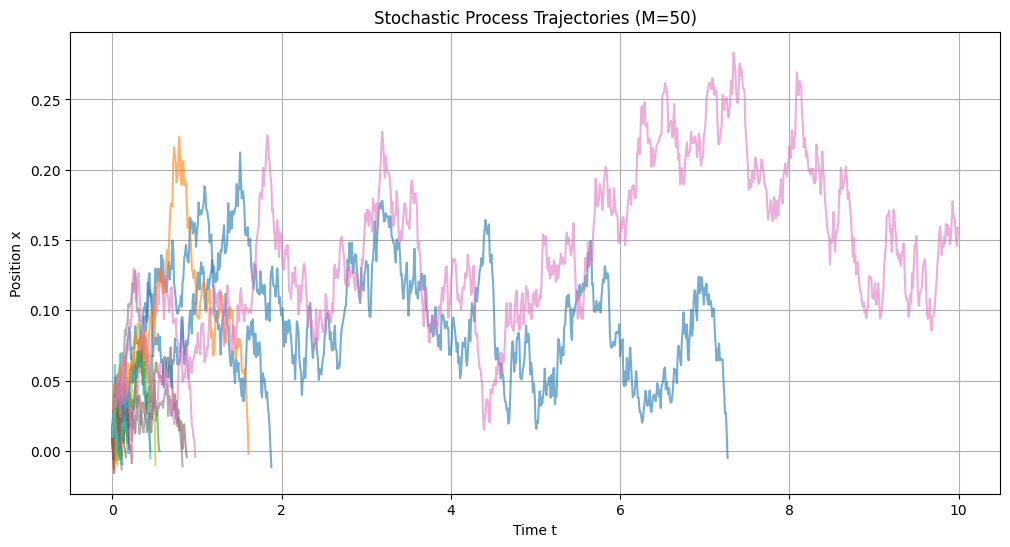

In [46]:
# Parameters
R0 = 0.99          # Control parameter R0 > 1
sigma = 0.1       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 10            # Total time
N = int(T / dt)   # Maximum number of time steps
M = 50            # Number of simulations

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**2 )

# Initialize lists to store all trajectories
all_x = []    # List to store positions from all simulations
all_time = [] # List to store corresponding time arrays

# Simulate M stochastic processes
for sim in range(M):
    x = [0.01]  # Start at the fixed point x = R0 - 1
    time = [0]
    
    for i in range(1, N):
        deterministic = force(x[-1], R0) * dt
        stochastic = sigma * np.sqrt(dt) * np.random.normal()
        x_new = x[-1] + deterministic + stochastic

        # Check if x hits 0 or goes below
        if x_new <= 0:
            # Append the last position and time
            x.append(x_new)
            time.append(i * dt)
            print(f"Simulation {sim+1} stopped at time t = {i * dt:.2f} because x reached {x_new:.4f}")
            break

        x.append(x_new)
        time.append(i * dt)
    else:
        # If the loop didn't break, the simulation reached the maximum time
        print(f"Simulation {sim+1} reached the maximum time without hitting x <= 0")
    
    # Store the trajectory
    all_x.append(np.array(x))
    all_time.append(np.array(time))

# Plot all trajectories
plt.figure(figsize=(12, 6))
for i in range(M):
    plt.plot(all_time[i], all_x[i], label=f'Simulation {i+1}', alpha=0.6)

plt.xlabel('Time t')
plt.ylabel('Position x')
plt.title(f'Stochastic Process Trajectories (M={M})')
# If M is large, we might not want to show all labels
if M <= 10:
    plt.legend()
plt.grid(True)
plt.show()


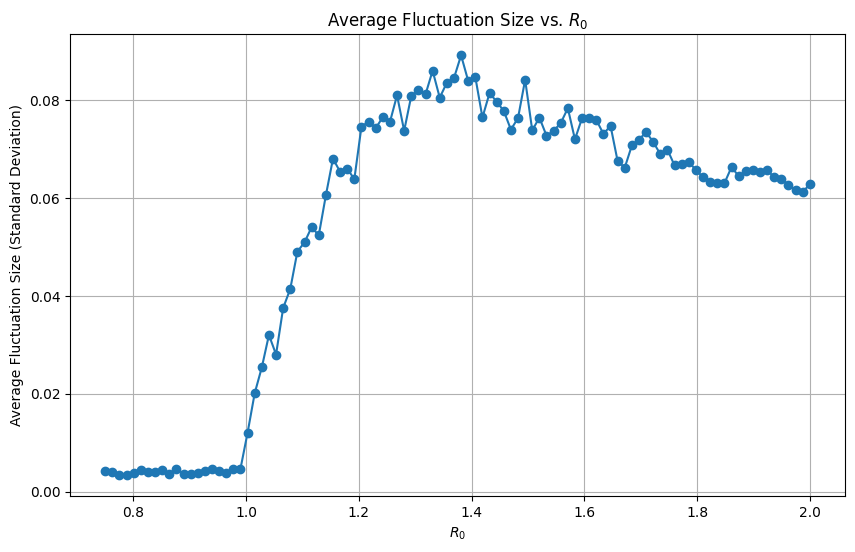

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 0.1       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 10            # Total time
N = int(T / dt)   # Maximum number of time steps
M = 50            # Number of simulations per R0
R0_values = np.linspace(0.75, 2.0, 100)  # Range of R0 values

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**2 )

# Initialize lists to store results
fluctuation_sizes = []

# Loop over R0 values
for R0 in R0_values:
    fluctuation_sizes_per_R0 = []  # To store fluctuation sizes for current R0
    
    # Run M simulations for each R0
    for sim in range(M):
        x = [R0 - 1]  # Start at the fixed point x = R0 - 1
        time = [0]
        
        for i in range(1, N):
            deterministic = force(x[-1], R0) * dt
            stochastic = sigma * np.sqrt(dt) * np.random.normal()
            x_new = x[-1] + deterministic + stochastic

            # Check if x hits 0 or goes below
            if x_new <= 0:
                x.append(x_new)
                time.append(i * dt)
                break

            x.append(x_new)
            time.append(i * dt)
        
        # Convert x to numpy array
        x = np.array(x)
        
        # Calculate fluctuations (deviations from the mean position)
        fluctuations = x - np.mean(x)
        
        # Estimate fluctuation size (standard deviation)
        fluctuation_size = np.std(fluctuations)
        fluctuation_sizes_per_R0.append(fluctuation_size)
    
    # Compute average fluctuation size for current R0
    avg_fluctuation_size = np.mean(fluctuation_sizes_per_R0)
    fluctuation_sizes.append(avg_fluctuation_size)

# Plot average fluctuation size vs R0
plt.figure(figsize=(10, 6))
plt.plot(R0_values, fluctuation_sizes, marker='o')
plt.xlabel('$R_0$')
plt.ylabel('Average Fluctuation Size (Standard Deviation)')
plt.title('Average Fluctuation Size vs. $R_0$')
plt.grid(True)
plt.show()


100%|██████████| 1000/1000 [01:25<00:00, 11.70it/s]


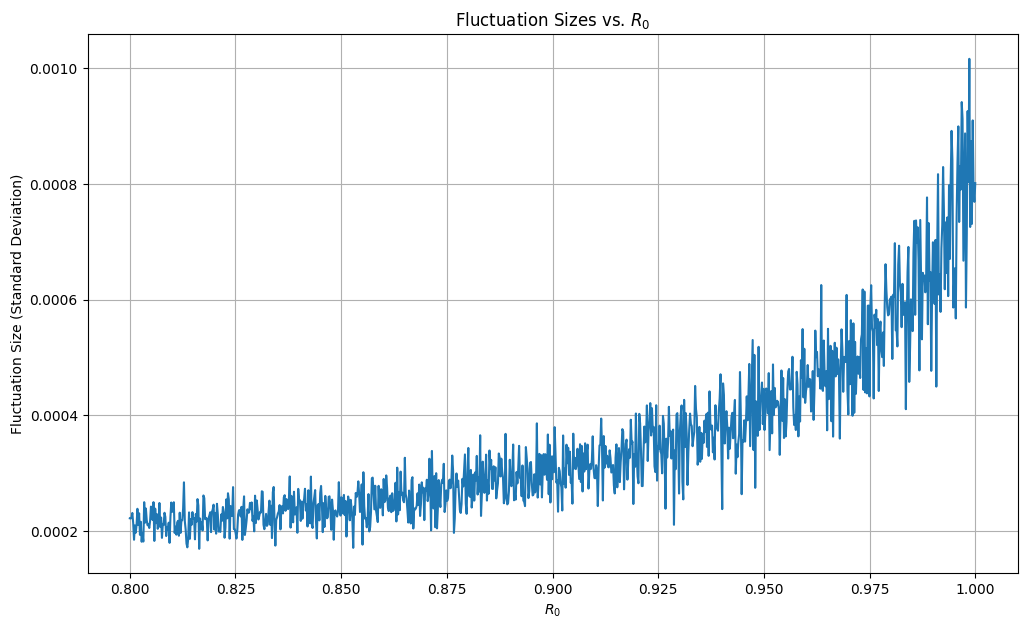

In [48]:
# Parameters
sigma = 0.01       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 1000            # Total time
N = int(T / dt)   # Maximum number of time steps
M = 100           # Number of simulations per R0
R0_values = np.linspace(.8, 1, 1000)  # Range of R0 values

initial_shock = 0.01

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**3 )

# Initialize lists to store results
fluctuation_sizes = []
std_errors = []
fluctuation_sizes_per_R0_list = []  # List to store all fluctuation sizes for each R0

# Loop over R0 values
for R0 in tqdm(R0_values):
    fluctuation_sizes_per_R0 = []  # To store fluctuation sizes for current R0
    
    # Run M simulations for each R0
    for sim in range(M):
        x = [initial_shock]  # Start at the fixed point x = R0 - 1
        time = [0]
        
        for i in range(1, N):
            deterministic = force(x[-1], R0) * dt
            stochastic = sigma * np.sqrt(dt) * np.random.normal()
            x_new = x[-1] + deterministic + stochastic

            # Check if x hits 0 or goes below
            if x_new <= 0:
                x.append(x_new)
                time.append(i * dt)
                break

            x.append(x_new)
            time.append(i * dt)
        
        # Convert x to numpy array
        x = np.array(x)
        
        # Calculate fluctuations (deviations from the mean position)
        fluctuations = x - initial_shock#np.mean(x)
        
        # Estimate fluctuation size (standard deviation)
        fluctuation_size = np.std(fluctuations)
        fluctuation_sizes_per_R0.append(fluctuation_size)
    
    # Compute average fluctuation size and standard error for current R0
    avg_fluctuation_size = np.mean(fluctuation_sizes_per_R0)
    std_error = np.std(fluctuation_sizes_per_R0) / np.sqrt(M)
    
    fluctuation_sizes.append(avg_fluctuation_size)
    std_errors.append(std_error)
    fluctuation_sizes_per_R0_list.append(fluctuation_sizes_per_R0)


# Plot average fluctuation size vs R0 with error bars
plt.figure(figsize=(12, 7))
plt.plot(R0_values, std_errors)

# Plot all individual fluctuation sizes as scatter points
# for i, R0 in enumerate(R0_values):
#     y = fluctuation_sizes_per_R0_list[i]
#     x = np.full(len(y), R0)
#     # Add some jitter to x for better visualization
#     x_jitter = x + np.random.uniform(-0.015, 0.015, size=len(y))
#     plt.scatter(x, y, alpha=0.4, color='gray', edgecolors='none')


plt.xlabel('$R_0$')
plt.ylabel('Fluctuation Size (Standard Deviation)')
plt.title('Fluctuation Sizes vs. $R_0$')
plt.grid(True)
plt.show()


100%|██████████| 100/100 [00:06<00:00, 15.13it/s]


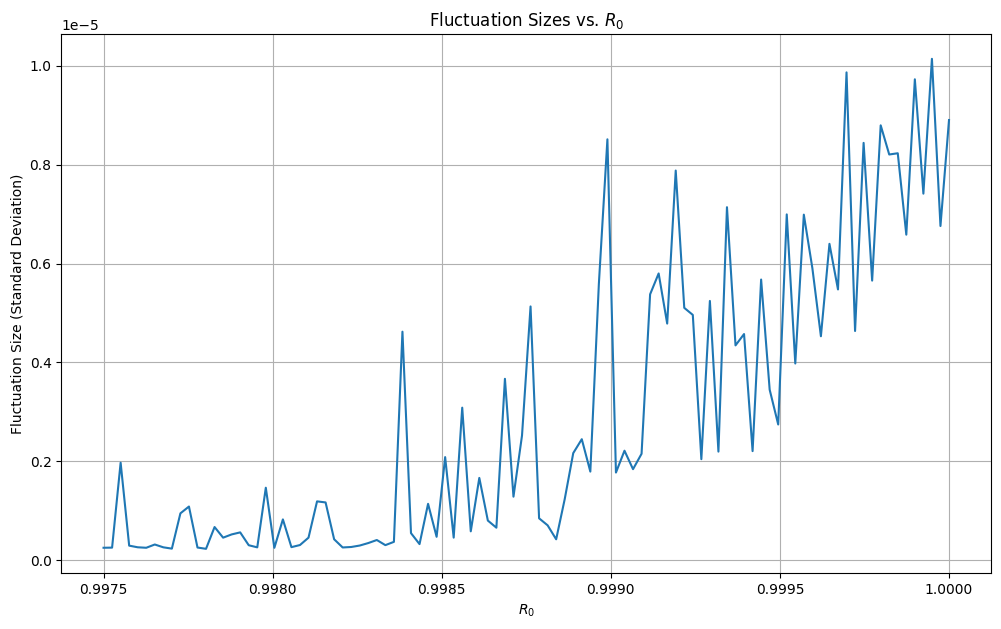

In [58]:
# Parameters
sigma = 0.01       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 1000            # Total time
N = int(T / dt)   # Maximum number of time steps
M = 1000           # Number of simulations per R0
R0_values = np.linspace(.9975, 1, 100)  # Range of R0 values

initial_shock = 0.01

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**3 )

# Initialize lists to store results
fluctuation_sizes = []
std_errors = []
fluctuation_sizes_per_R0_list = []  # List to store all fluctuation sizes for each R0

# Loop over R0 values
for R0 in tqdm(R0_values):
    fluctuation_sizes_per_R0 = []  # To store fluctuation sizes for current R0
    
    # Run M simulations for each R0
    for sim in range(M):
        x = [R0-1]  # Start at the fixed point x = R0 - 1
        time = [0]
        
        for i in range(1, N):
            deterministic = force(x[-1], R0) * dt
            stochastic = sigma * np.sqrt(dt) * np.random.normal()
            x_new = x[-1] + deterministic + stochastic

            # Check if x hits 0 or goes below
            if x_new <= 0:
                x.append(x_new)
                time.append(i * dt)
                break

            x.append(x_new)
            time.append(i * dt)
        
        # Convert x to numpy array
        x = np.array(x)
        
        # Estimate fluctuation size (standard deviation)
        fluctuation_size = np.var(x)
        fluctuation_sizes_per_R0.append(fluctuation_size)
    
    # Compute average fluctuation size and standard error for current R0
    avg_fluctuation_size = np.mean(fluctuation_sizes_per_R0)
    std_error = np.std(fluctuation_sizes_per_R0) / np.sqrt(M)
    
    fluctuation_sizes.append(avg_fluctuation_size)
    std_errors.append(std_error)
    fluctuation_sizes_per_R0_list.append(fluctuation_sizes_per_R0)


# Plot average fluctuation size vs R0 with error bars
plt.figure(figsize=(12, 7))
plt.plot(R0_values, fluctuation_sizes)

# Plot all individual fluctuation sizes as scatter points
# for i, R0 in enumerate(R0_values):
#     y = fluctuation_sizes_per_R0_list[i]
#     x = np.full(len(y), R0)
#     # Add some jitter to x for better visualization
#     x_jitter = x + np.random.uniform(-0.015, 0.015, size=len(y))
#     plt.scatter(x, y, alpha=0.4, color='gray', edgecolors='none')


plt.xlabel('$R_0$')
plt.ylabel('Fluctuation Size (Standard Deviation)')
plt.title('Fluctuation Sizes vs. $R_0$')
plt.grid(True)
plt.show()


/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_71521/3960248394.py:26: DeprecationWarning: You are passing x=[0.         0.002002   0.004004   0.00600601 0.00800801 0.01001001
 0.01201201 0.01401401 0.01601602 0.01801802 0.02002002 0.02202202
 0.02402402 0.02602603 0.02802803 0.03003003 0.03203203 0.03403403
 0.03603604 0.03803804 0.04004004 0.04204204 0.04404404 0.04604605
 0.04804805 0.05005005 0.05205205 0.05405405 0.05605606 0.05805806
 0.06006006 0.06206206 0.06406406 0.06606607 0.06806807 0.07007007
 0.07207207 0.07407407 0.07607608 0.07807808 0.08008008 0.08208208
 0.08408408 0.08608609 0.08808809 0.09009009 0.09209209 0.09409409
 0.0960961  0.0980981  0.1001001  0.1021021  0.1041041  0.10610611
 0.10810811 0.11011011 0.11211211 0.11411411 0.11611612 0.11811812
 0.12012012 0.12212212 0.12412412 0.12612613 0.12812813 0.13013013
 0.13213213 0.13413413 0.13613614 0.13813814 0.14014014 0.14214214
 0.14414414 0.14614615 0.14814815 0.15015015 0.15215215 0.15415415
 0.15615

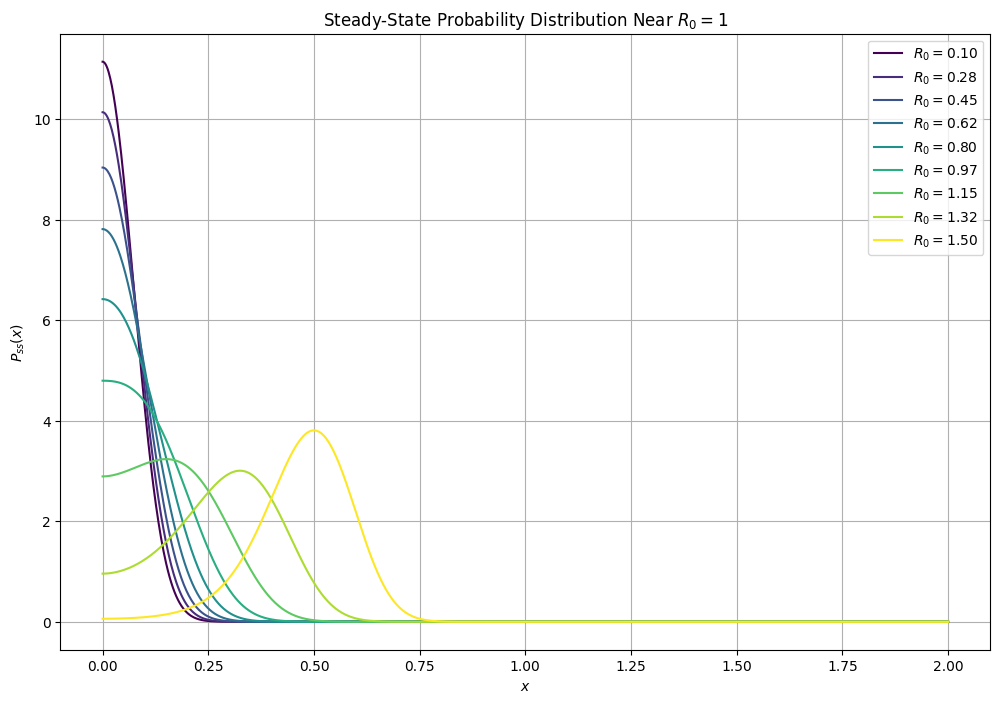

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
import matplotlib.cm as cm

# Parameters
sigma = 0.1
R0_values = np.linspace(0.1, 1.5, 9)  # Finer R0 range near 1
x_min = 0
x_max = 2.0
x_points = 1000

# Create x values
x = np.linspace(x_min, x_max, x_points)

def P_ss(x, R0, sigma):
    exponent = (2 / sigma**2) * (0.5 * (R0 - 1) * x**2 - (1/3) * x**3)
    exponent -= np.max(exponent)
    return np.exp(exponent)

plt.figure(figsize=(12, 8))
colors = cm.viridis(np.linspace(0, 1, len(R0_values)))

for idx, R0 in enumerate(R0_values):
    P_unnormalized = P_ss(x, R0, sigma)
    integral = simpson(P_unnormalized, x)
    P_normalized = P_unnormalized / integral
    plt.plot(x, P_normalized, label=f'$R_0 = {R0:.2f}$', color=colors[idx])

plt.xlabel('$x$')
plt.ylabel('$P_{ss}(x)$')
plt.title('Steady-State Probability Distribution Near $R_0 = 1$')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_71521/1455420417.py:37: DeprecationWarning: You are passing x=[-1.       -0.997999 -0.995998 ...  2.995998  2.997999  3.      ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_P = simpson(P_unnormalized, x)
/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_71521/1455420417.py:42: DeprecationWarning: You are passing x=[-1.       -0.997999 -0.995998 ...  2.995998  2.997999  3.      ] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  mean = simpson(xP, x)
/var/folders/0g/mj2jqwl51fjfb8vz5shd6hw00000gp/T/ipykernel_71521/1455420417.py:46: DeprecationWarning: You are passing x=[-1.       -0.997999 -0.995998 ...  2.995998  2.997999  3.      ] as a positional argument. Please change your invo

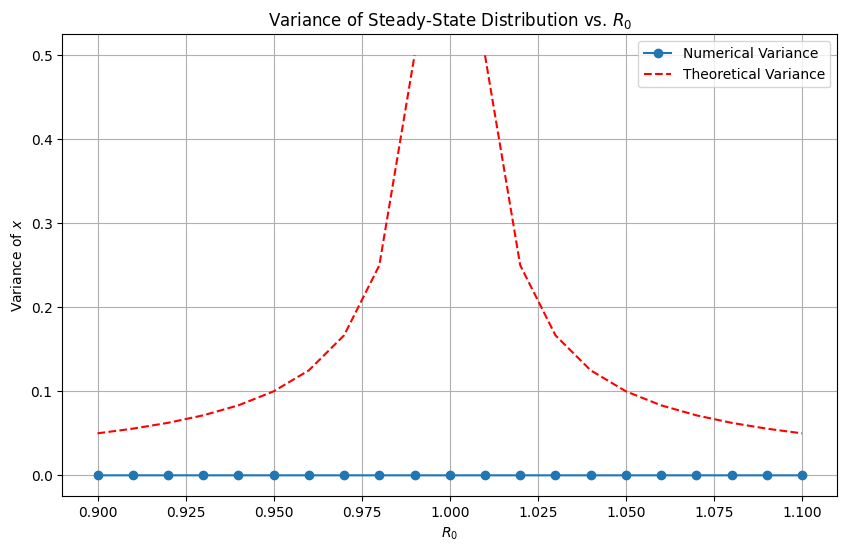

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

# Parameters
sigma = 0.1
R0_values = np.linspace(0.9, 1.1, 21)  # R0 values around the critical point
x_min = -1.0
x_max = 3.0
x_points = 2000

# Create x values
x = np.linspace(x_min, x_max, x_points)

# Theoretical variance function
def theoretical_variance(R0, sigma):
    if R0 != 1:
        return sigma**2 / (2 * abs(R0 - 1))
    else:
        return np.inf  # Variance diverges at R0 = 1

# Arrays to store results
numerical_variances = []
theoretical_variances = []

# Function to compute unnormalized P_ss(x)
def P_ss(x, R0, sigma):
    exponent = (2 / sigma**2) * (0.5 * (R0 - 1) * x**2 - (1/3) * x**3)
    exponent -= np.max(exponent)  # Prevent overflow
    return np.exp(exponent)

for R0 in R0_values:
    # Compute unnormalized probability density
    P_unnormalized = P_ss(x, R0, sigma)
    
    # Normalize the probability density
    integral_P = simpson(P_unnormalized, x)
    P_normalized = P_unnormalized / integral_P
    
    # Compute mean
    xP = x * P_normalized
    mean = simpson(xP, x)
    
    # Compute variance
    x2P = x**2 * P_normalized
    mean_x2 = simpson(x2P, x)
    variance = mean_x2 - mean**2
    numerical_variances.append(variance)
    
    # Compute theoretical variance
    if R0 != 1:
        var_theoretical = theoretical_variance(R0, sigma)
    else:
        var_theoretical = np.nan  # Avoid division by zero
    theoretical_variances.append(var_theoretical)

# Convert lists to arrays
numerical_variances = np.array(numerical_variances)
theoretical_variances = np.array(theoretical_variances)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(R0_values, numerical_variances, 'o-', label='Numerical Variance')
plt.plot(R0_values, theoretical_variances, 'r--', label='Theoretical Variance')
plt.xlabel('$R_0$')
plt.ylabel('Variance of $x$')
plt.title('Variance of Steady-State Distribution vs. $R_0$')
plt.legend()
plt.grid(True)
plt.show()
